In [156]:
import os
import numpy as np
import h5py
from matplotlib import pyplot as plt

from nbodykit.lab import ArrayCatalog


# PRIYA - Data Loading

In [3]:
!ls ../data

bigfile  mfbox	npy


In [4]:
# pre-stored position file
ppos = np.load("../data/npy/ppos_hr_sightline_20mpc.npy")

In [5]:
Lbox = 120000 # Boxsize: 120 Mpc

# 120 Mpc, 20 Mpc, 20 Mpc
Lx, Ly, Lz = Lbox, 20000, 20000

center = np.array([0.5 * Lbox, 40000, 40000])

# reposition the particles to the original part locations
ppos += center

In [6]:
ppos[:, 0].max(), ppos[:, 0].min(), ppos[:, 1].max(), ppos[:, 1].min(), ppos[:, 2].max(), ppos[:, 2].min()

(119999.99, 0.00390625, 49999.996, 30000.002, 49999.996, 30000.002)

## Find DLA sightlines within my limited data

In [7]:
# base_dir = "/bigdata/birdlab/shared/Lya_emu_spectra/emu_full/"
base_dir = "/bigdata/birdlab/shared/Lya_emu_spectra/emu_full_hires/"
simulation_dir = "ns0.909Ap1.98e-09herei3.75heref3.01alphaq2.43hub0.682omegamh20.14hireionz7.6bhfeedback0.0449"

# pointing to the spectra folder
snapshot_num = 25

spectra_file = os.path.join(
    base_dir,
    simulation_dir,
    "output",
    "SPECTRA_025",
    "lya_forest_spectra_grid_480.hdf5",
)

In [8]:
# Read one spectrum
with h5py.File(spectra_file, "r") as f:
    print(f.keys())
    print(f["Header"].keys())  # Empty
    print(f["tau/H/1/1215"].shape)  # Shape

    axis = f["spectra/axis"][
        :
    ]  # Axis = (1: x direction; 2: y direction; 3: z direction)
    cofm = f["spectra/cofm"][:]  # Center of mass

    print(f["temperature"])  # Empty
    tau = f["tau/H/1/1215"][:]  # The optical depth of the spectra

<KeysViewHDF5 ['Header', 'colden', 'density_weight_density', 'num_important', 'spectra', 'tau', 'tau_obs', 'temperature', 'velocity']>
<KeysViewHDF5 []>
(691200, 1220)
<HDF5 group "/temperature" (0 members)>


In [9]:
# only select the spectra within my limited data
cofm.shape
# x, y, z

# only select the sightlines from x directions
ind = cofm[:, 0] == 0

# within the limited box
ind &= cofm[:, 1] < (center[1] + Ly * 0.5)
ind &= cofm[:, 1] > (center[1] - Ly * 0.5)
ind &= cofm[:, 2] < (center[2] + Lz * 0.5)
ind &= cofm[:, 2] > (center[2] - Lz * 0.5)

print("Total sightlines within my limited data:", ind.sum())

Total sightlines within my limited data: 6241


In [10]:
# selected sightlines
tau_selected = tau[ind, :]
cofm_selected = cofm[ind, :]

cofm_selected.shape, tau_selected.shape

((6241, 3), (6241, 1220))

In [11]:
# Find DLAs
ind = np.any(tau_selected > 10**6, axis=1)
dla_specs = np.where(ind)[0]
dla_specs

array([  57,   59,   60,   79,   95,  118,  185,  192,  200,  205,  215,
        267,  329,  353,  376,  439,  456,  469,  474,  488,  524,  605,
        634,  649,  665,  684,  753,  791,  849,  854,  875,  894,  992,
       1003, 1032, 1044, 1060, 1073, 1089, 1109, 1147, 1186, 1264, 1345,
       1389, 1470, 1507, 1545, 1547, 1551, 1554, 1627, 1662, 1722, 1731,
       1817, 1864, 1899, 1943, 1948, 1962, 1989, 1991, 2021, 2027, 2047,
       2050, 2052, 2059, 2066, 2094, 2109, 2134, 2147, 2151, 2173, 2178,
       2181, 2276, 2277, 2294, 2295, 2307, 2375, 2382, 2423, 2450, 2463,
       2467, 2476, 2491, 2496, 2498, 2500, 2502, 2515, 2563, 2570, 2587,
       2615, 2633, 2637, 2650, 2655, 2662, 2707, 2728, 2731, 2756, 2781,
       2817, 2842, 2929, 2945, 2981, 2991, 3005, 3026, 3059, 3062, 3075,
       3124, 3143, 3176, 3199, 3216, 3250, 3262, 3278, 3279, 3348, 3375,
       3410, 3421, 3452, 3465, 3490, 3587, 3603, 3627, 3631, 3690, 3701,
       3714, 3721, 3740, 3758, 3769, 3794, 3804, 38

In [60]:
np.argsort(np.sum(np.abs(cofm_selected[dla_specs] - np.array([0, center[1], center[2]])), axis=1))

array([124, 128, 129, 121, 106,  97, 102,  96,  90, 107, 130, 137,  75,
       146,  70, 138, 101, 103,  91, 117, 157, 110, 162, 155, 169,  76,
       127,  92, 125, 118, 113, 133, 100, 177, 134, 145,  93,  89,  63,
       114,  77, 131, 185, 104, 119, 184,  94, 189,  85, 105, 122,  58,
        56, 141, 123,  47, 147, 158,  51,  98,  48,  64,  40, 196, 109,
       204,  59, 151, 167,  88,  44, 215,  71, 174, 136, 126, 132,  45,
        49, 115, 153, 170, 166, 161,  32,  36, 135,  37, 190, 212,  87,
        74,  26, 150,  82, 163, 191,  50, 142, 112, 120,  95, 149,  84,
       175, 178, 108, 179,  78, 216, 182,  99,  24,  62, 116,  13,  79,
       203,  73, 205, 183, 208, 228,   5,  61,  15, 173, 139, 192, 156,
       144, 223, 176,  69, 217, 188, 227, 159,   8, 231, 198, 224,  53,
         7, 111,  60, 211,  31, 140,  33,  83,  20, 181,  25, 172, 220,
       207, 222, 225,  11,   9,  21, 154,  81,  86, 148, 143,  80,  65,
       234, 168, 221,  68, 164, 186, 209,  35,  38,  28,   6, 17

In [61]:
cofm_selected[dla_specs[124]], cofm_selected[dla_specs[128]]

(array([    0., 40250., 40000.]), array([    0., 40500., 40000.]))

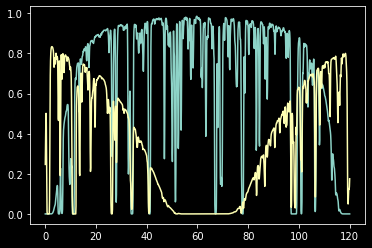

In [159]:
# One spectrum optical depth
# DLA
i = 124

spec = dla_specs[i]

x = np.linspace(0, Lbox / 1000, tau_selected[spec, :].shape[0])

flux = np.exp(-tau_selected[spec, :])
plt.plot(x, flux)
# plt.vline()

# 2 DLA
i = 129
spec = dla_specs[i]
flux = np.exp(-tau_selected[spec, :])
plt.plot(x, flux)
# plt.vline()

In [104]:
plt.style.use("dark_background")

Text(0.5, 0, 'Distance [cMpc/h]')

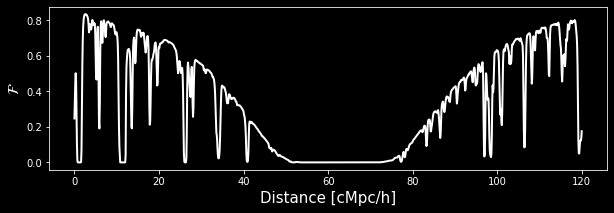

In [160]:
f, ax = plt.subplots(1, 1, figsize=(10, 3))
f.subplots_adjust(hspace=0.002)
f.patch.set_facecolor("xkcd:black")

i = 129
spec = dla_specs[i]
flux = np.exp(-tau_selected[spec, :])
ax.plot(x, flux, color="white", lw=2)
ax.set_ylabel(r"$\mathcal{F}$", fontsize=15)
ax.set_xlabel("Distance [cMpc/h]", fontsize=15)


In [64]:
cofm_selected[dla_specs[129]]

array([    0., 40500., 40250.])

## Plot projected DLA

In [65]:
dla_center = np.array([60000., 40500., 40250.])

# around the DLA
ppos_dla = ppos - dla_center
ppos_dla.shape

(722021982, 3)

In [66]:
[(ppos_dla[:, i].min(), ppos_dla[:, i].max()) for i in range(3)]

[(-59999.99609375, 59999.9921875),
 (-10499.998046875, 9499.99609375),
 (-10249.998046875, 9749.99609375)]

In [235]:
Lx_dla = 5000 # kpc
Ly_dla = 5000 # kpc
Lz_dla = 5000 # kpc

ind = ppos_dla[:, 0]  < Lx_dla / 2
ind &= ppos_dla[:, 0] > -Lx_dla / 2
ind &= ppos_dla[:, 1] < Ly_dla / 2
ind &= ppos_dla[:, 1] > -Ly_dla / 2
ind &= ppos_dla[:, 2] < Lz_dla / 2
ind &= ppos_dla[:, 2] > -Lz_dla / 2

ind.sum()

1959114

In [236]:
new_ppos_dla = ppos_dla[ind]
new_ppos_dla.shape

(1959114, 3)

In [237]:
[(new_ppos_dla[:, i].min(), new_ppos_dla[:, i].max()) for i in range(3)]

[(-2499.9921875, 2499.99609375),
 (-2499.99609375, 2499.99609375),
 (-2499.9921875, 2499.9921875)]

In [238]:
new_ppos_dla += np.array([Lx_dla / 2, Ly_dla / 2, Lz_dla / 2])
new_ppos_dla

array([[1052.671875  , 4991.33203125,   27.296875  ],
       [1075.453125  , 4999.37109375,   52.0546875 ],
       [1040.49609375, 4985.359375  ,   64.41015625],
       ...,
       [4578.80859375, 4997.52734375,   35.76953125],
       [4554.79296875, 4998.5859375 ,   50.0390625 ],
       [4605.8515625 , 4995.5703125 ,   57.05859375]])

In [239]:
# create catalog from in-memory particles
cat = ArrayCatalog(
    {
        "Position": new_ppos_dla,   # positions of gas particles
    }
)
cat.attrs["BoxSize"] = Lx_dla

In [254]:
# Size of the mesh (Nmesh, Nmesh, Nmesh)
Nmesh: int = 1000

# Interpolation window
resampler: str = "tsc"

# Gas particle mesh
mesh = cat.to_mesh(Nmesh=Nmesh, resampler=resampler)

# Gas internal energy mesh
gasen_mesh = cat.to_mesh(compensated=True, Nmesh=Nmesh, resampler='tsc', position='Position',)

In [255]:
# Gas particle field
painted_field = mesh.paint(mode="real")

In [256]:
from matplotlib.colors import LogNorm

In [257]:
field_y_z = painted_field.preview(axes=(1, 2)).T

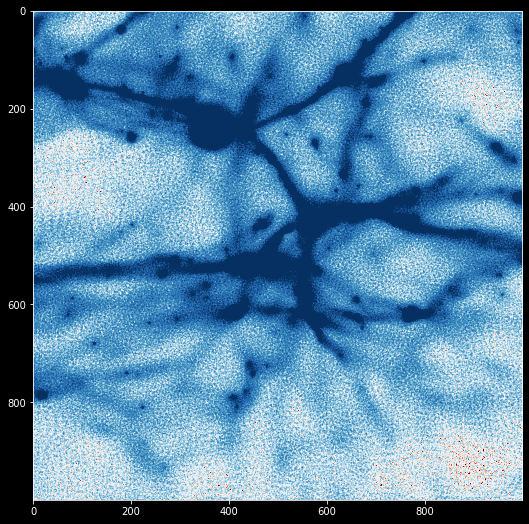

In [262]:
plt.figure(figsize=(24, 9))
plt.imshow(
    field_y_z,
    norm=LogNorm(vmin=1e1, vmax=2e3),
    cmap="RdBu",
#     origin="lower",
)


In [143]:
field_y_z.max()

1014303.5

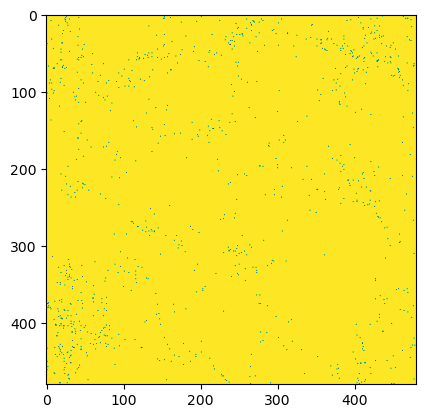

In [80]:
# Visualize one pixel in the spectra
# roughly ~25 Mpc in x
tau_grid = tau[ind_axis, :100].sum(axis=1)
ind_dla = tau_grid > 10**6
tau_grid[~ind_dla] = 0

plt.imshow( np.exp(-tau_grid).reshape(480, 480) )
# plt.savefig("sightlines.png", format="png", dpi=150, transparent=True);

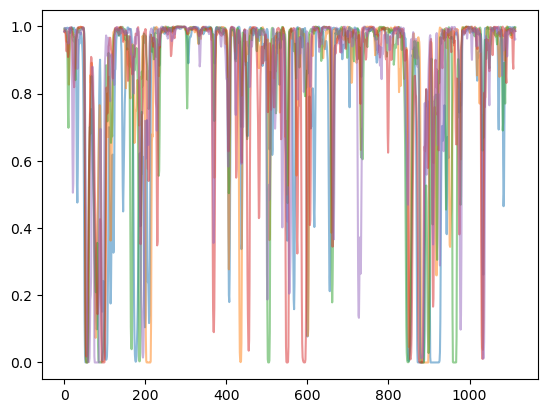

In [8]:
# Plot the fluxes from the first 5 spectra
plt.plot(np.exp(-tau[0:5, :]).T, alpha=0.5)

In [9]:
# Axis shows the directions of the spectra
axis

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [10]:
# Center of mass in kpc
cofm[:10]

array([[   0.,    0.,    0.],
       [   0.,    0.,  250.],
       [   0.,    0.,  500.],
       [   0.,    0.,  750.],
       [   0.,    0., 1000.],
       [   0.,    0., 1250.],
       [   0.,    0., 1500.],
       [   0.,    0., 1750.],
       [   0.,    0., 2000.],
       [   0.,    0., 2250.]])

In [11]:
# Convert optical depth to flux
flux = np.exp(-tau)

In [12]:
# image
np.sqrt(sum(axis == 1))

480.0

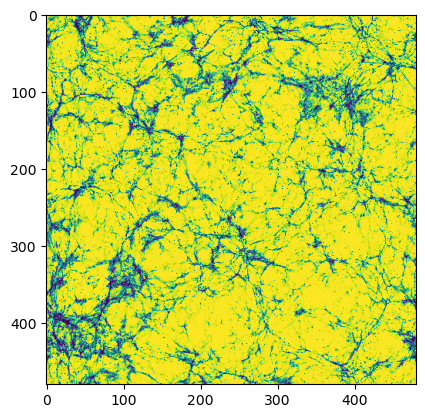

In [13]:
# Visualize one pixel in the spectra
plt.imshow(flux[axis == 1, 0].reshape(480, 480))
plt.savefig("sightlines.png", format="png", dpi=150, transparent=True);

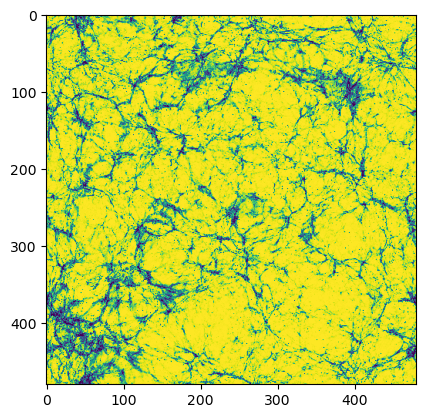

In [15]:
# Visualize one pixel in the spectra
plt.imshow(flux[axis == 1, 10].reshape(480, 480))

## Dataloader

In [19]:
class LyaSpectra:

    """
    A Data holder of simulated Lya sightlines from one simulation.
    """

    def __init__(
        self,
        base_dir="../data/",
        simulation_dir="ns0.803Ap2.2e-09herei4.05heref2.67alphaq2.21hub0.735omegamh20.141hireionz7.17bhfeedback0.056",
        # pointing to the spectra folder
        snapshot_num=23,
    ):
        # Specify the snapshot number instead of just use a path of the filename -
        # This is to prevent bad behavior in the future since there's almost no simulation information stored in the
        # spectra hdf5 file, so users must know what simulation they are using.
        self.spectra_file = os.path.join(
            base_dir,
            simulation_dir,
            "output",
            "SPECTRA_{}".format(str(snapshot_num).zfill(3)),
            "lya_forest_spectra_grid_480.hdf5",
        )

        # Read one spectrum
        with h5py.File(self.spectra_file, "r") as f:
            print("[Info] Keys in the file:", f.keys())
            print("[Info] Header:", f["Header"].keys())
            print("[Info] Shape of the tau:", f["tau/H/1/1215"].shape)  # Shape

            self._axis = f["spectra/axis"][
                :
            ]  # Axis = (1: x direction; 2: y direction; 3: z direction)
            self._cofm = f["spectra/cofm"][:]  # Center of mass

            self._tau = f["tau/H/1/1215"][:]  # The optical depth of the spectra

        print("[Info] Convert optical depth tau to flux ...")
        self._flux = np.exp(-self._tau)
        print("done.")

    @property
    def axis(self):
        """
        Axis of the sightline directions, (1: x direction; 2: y direction; 3: z direction),
        Sightlines always parallel to the x,y,or z direction, so this describes the
        parallel direction of the sightlines.
        """
        return self._axis

    @property
    def cofm(self):
        """
        Center of the mass of the sightline, in the format of
            [number of sightlines, number of sightline directions (x, y, z)]
        """
        return self._cofm

    @property
    def flux(self):
        """
        Flux of the simulated Lya forest, range from (0, 1), 0 for completely absorbed.
            (number of sightlines, number of pixels in each sightlines)
        """
        return self._flux

    @property
    def tau(self):
        """
        Optical depth of the simulated Lya forest, -log(flux).
            (number of sightlines, number of pixels in each sightlines)
        """
        return self._tau

In [20]:
lya_spectra = LyaSpectra(
    base_dir="../data",
    simulation_dir="ns0.803Ap2.2e-09herei4.05heref2.67alphaq2.21hub0.735omegamh20.141hireionz7.17bhfeedback0.056",
    snapshot_num=23,
)

[Info] Keys in the file: <KeysViewHDF5 ['Header', 'colden', 'density_weight_density', 'num_important', 'spectra', 'tau', 'tau_obs', 'temperature', 'velocity']>
[Info] Header: <KeysViewHDF5 []>
[Info] Shape of the tau: (691200, 1114)
[Info] Convert optical depth tau to flux ...
done.
